# Model Comparisons

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

### Here are what the columns represent:

1) credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

2) purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

3) int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

4) installment: The monthly installments owed by the borrower if the loan is funded.

5) log.annual.inc: The natural log of the self-reported annual income of the borrower.

6) dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

7) fico: The FICO credit score of the borrower.

8) days.with.cr.line: The number of days the borrower has had a credit line.

9) revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

10) revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

11) inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

12) delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

13) pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## import packages


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
ld = pd.read_csv('D:\\learning\\Refactored_Py_DS_ML_Bootcamp-master\\15-Decision-Trees-and-Random-Forests\\loan_data.csv')

In [3]:
ld.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
ld.info()
#from the info below we have only the purpose feature to be non numeric . let's see if we can change this into categorical feature 
# data cleaning is not required as we do not have null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
ld['purpose'].nunique()

7

Text(0.5, 0, 'FICO score')

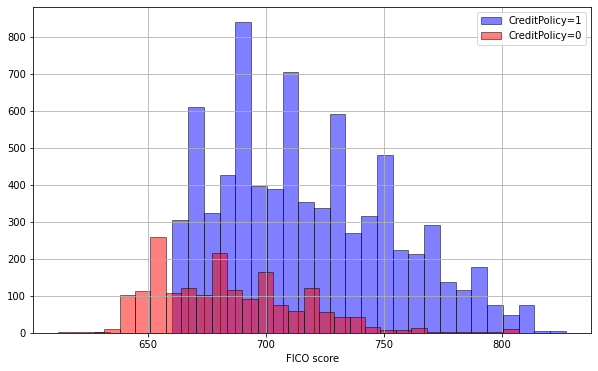

In [6]:
plt.figure(figsize=(10,6))
ld[ld['credit.policy'] == 1]['fico'].hist(bins=30,alpha=0.5,label='CreditPolicy=1',color='blue',edgecolor='k')
ld[ld['credit.policy'] == 0]['fico'].hist(bins=30,alpha=0.5,label='CreditPolicy=0',color='red',edgecolor='k')
plt.legend()
plt.xlabel('FICO score')
# inference : all borrowers with a FICO score greater than 660 meet the credit underwriting criteria.The graph shows the different FICO score of borrowers whether they meet the bank's criteria

Text(0.5, 0, 'FICO score')

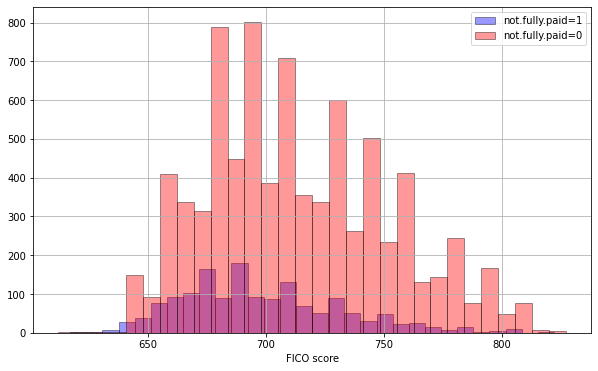

In [7]:
plt.figure(figsize=(10,6))
ld[ld['not.fully.paid'] == 1]['fico'].hist(bins=30,alpha=0.4,label='not.fully.paid=1',color='blue',edgecolor='k')
ld[ld['not.fully.paid'] == 0]['fico'].hist(bins=30,alpha=0.4,label='not.fully.paid=0',color='red',edgecolor='k')
plt.legend()
plt.xlabel('FICO score')
#inference : we have a lot of borrowers who have not fully paid 

Text(0.5, 1.0, 'Whether Fully paid or not')

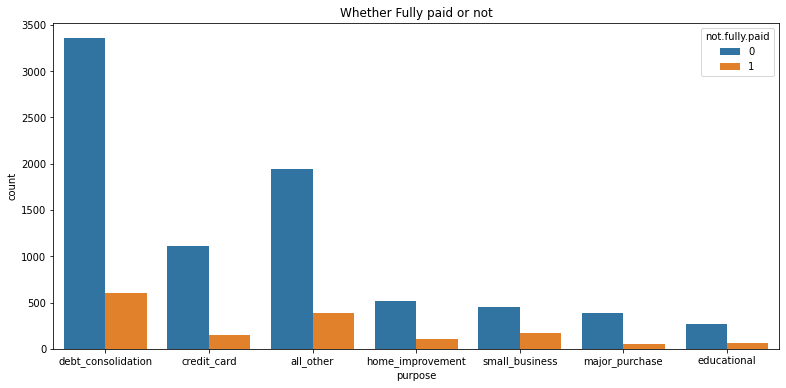

In [8]:
plt.figure(figsize=(13,6))
sns.countplot(x='purpose',data=ld,hue='not.fully.paid')
plt.title('Whether Fully paid or not')
# inference : The graph below gives us count of the fully paid and not paid borrowers , filtered by the purpose of their loan


<Figure size 1440x1440 with 0 Axes>

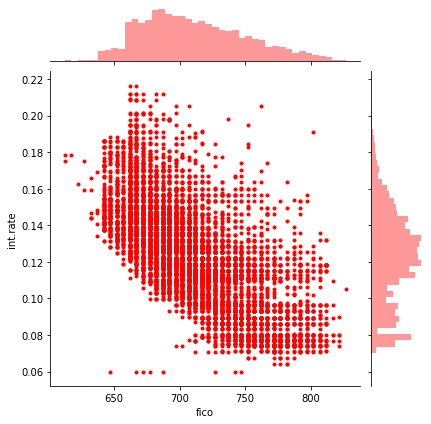

In [9]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='int.rate',data=ld,color='red',marker='.')
#inference : the FICO vs interest rate plot gives us the distribution and relation on how both are related to each other 

In [10]:
ld.columns


Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

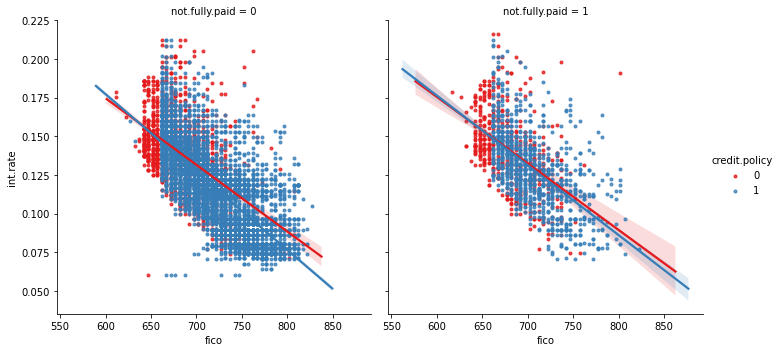

In [11]:
plt.figure(figsize=(20,10))
sns.lmplot(y='int.rate',x='fico',data=ld,col='not.fully.paid',hue='credit.policy',markers='.',palette='Set1')
#inference : 1)  the borrowers who do not meet the credit poicy tend to have high interest rate on their loan
# 2) from regression line :  As FICO score increases and interest rate decreases , the count of the borrowers meeting the credit policy also increases and vice versa

## Data Preparation


In [12]:
ld['purpose'].nunique()
# we have 7 unique values and hence we can make use of this by creating dummies

7

In [13]:
df1 = pd.get_dummies(ld['purpose'])

In [14]:
df1.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [15]:
ld_cat =  ld.join(df1)

In [16]:
ld_cat.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0


In [17]:
ld_cat.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype='object')

In [18]:
ld_cat.drop('purpose',axis=1,inplace=True)

## Standard Scalar



In [19]:
ld['credit.policy'].nunique()
# so this is a Classification data with two class labels
# we can use the folowing models
#1) Logistic Regression 
#2) knn algorithm
#3) Decision Trees
#4) Random Forest
#So lets see which algorithm has a greater accuracy in their default parameters
# Note : we can adjust the default parameters of any algorithm and increase the accuracy of our model.

2

In [51]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [56]:
standard_ld = sc.fit_transform(ld_cat.drop('credit.policy',axis=1))

In [59]:
standard_ld_cat= pd.DataFrame(data=standard_ld,columns=ld_cat.columns[1:])

In [60]:
standard_ld_cat.head(5)

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,-0.567142,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,-0.567142,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855


In [61]:
X = standard_ld_cat
y = ld_cat['credit.policy']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
print(X_train.shape)
print(X_test.shape)

(6417, 19)
(3161, 19)


## Decision Trees


In [65]:
from sklearn.tree import DecisionTreeClassifier


In [66]:
dtc = DecisionTreeClassifier()


In [67]:
dtc.fit(X_train,y_train)
# now we have a single decision tree splited using gini index

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
#Decision tree structure
print('leaves : ',dtc.tree_.n_leaves)
print('columns used : ',dtc.tree_.n_features)
print('nodes : ',dtc.tree_.node_count)
print('output : ',dtc.tree_.n_outputs)

leaves :  65
columns used :  19
nodes :  129
output :  1


In [69]:
y_pred = dtc.predict(X_test)
#getting our predictions 

In [70]:
sum(y_pred != y_test)
# number of misclassified test data

25

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [72]:
print('Confusion Matrix \n \n',confusion_matrix(y_test,y_pred))
print('\n \n \n Classification Report \n \n',classification_report(y_test,y_pred))

Confusion Matrix 
 
 [[ 570   12]
 [  13 2566]]

 
 
 Classification Report 
 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       582
           1       1.00      0.99      1.00      2579

    accuracy                           0.99      3161
   macro avg       0.99      0.99      0.99      3161
weighted avg       0.99      0.99      0.99      3161



## Random Forests


In [73]:
from sklearn.ensemble import RandomForestClassifier


In [74]:
rfc = RandomForestClassifier(n_estimators=500)
# n_estimators is the n number trees obtained from random subspace in bagging

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc.estimators_
# when 'n_estimators=5'
#we can see that we have 5 trees below , from which our expected value is aggregated 

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1603779955, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=528940580, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [76]:
y_pred1 = rfc.predict(X_test)


In [77]:
sum(y_pred1 != y_test)
# we still have misclassified data 

39

In [78]:
print('Confusion Matrix \n \n',confusion_matrix(y_test,y_pred1))
print('\n \n \n Classification Report \n \n',classification_report(y_test,y_pred1))

Confusion Matrix 
 
 [[ 555   27]
 [  12 2567]]

 
 
 Classification Report 
 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       582
           1       0.99      1.00      0.99      2579

    accuracy                           0.99      3161
   macro avg       0.98      0.97      0.98      3161
weighted avg       0.99      0.99      0.99      3161



In [79]:
err_num = []
for i in np.arange(100,2000,50):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    err_num.append(sum( pred != y_test ))

Text(0.5, 1.0, 'Error number vs k_estimators')

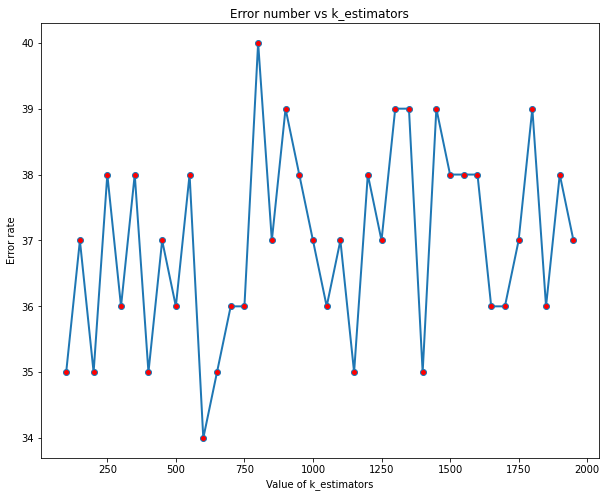

In [80]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(100,2000,50),err_num,linestyle='-',lw=2,marker='o',ms=6,mfc='red')
plt.xlabel('Value of k_estimators')
plt.ylabel('Error rate')
plt.title('Error number vs k_estimators')
#the error rate we obtained for k-estimators from 100 to 2000

## KNearestNeighbours


In [81]:
from sklearn.neighbors import KNeighborsClassifier


In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)

In [88]:
sum(y_pred2 != y_test)


331

In [89]:
print('Confusion Matrix \n \n',confusion_matrix(y_test,y_pred2))
print('\n \n \n Classification Report \n \n',classification_report(y_test,y_pred2))

Confusion Matrix 
 
 [[ 287  295]
 [  36 2543]]

 
 
 Classification Report 
 
               precision    recall  f1-score   support

           0       0.89      0.49      0.63       582
           1       0.90      0.99      0.94      2579

    accuracy                           0.90      3161
   macro avg       0.89      0.74      0.79      3161
weighted avg       0.89      0.90      0.88      3161



## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression


In [91]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred3 = lr.predict(X_test)

D:\learning\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
sum(y_pred3 != y_test)


279

In [93]:
print('Confusion Matrix \n \n',confusion_matrix(y_test,y_pred3))
print('\n \n \n Classification Report \n \n',classification_report(y_test,y_pred3))

Confusion Matrix 
 
 [[ 391  191]
 [  88 2491]]

 
 
 Classification Report 
 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       582
           1       0.93      0.97      0.95      2579

    accuracy                           0.91      3161
   macro avg       0.87      0.82      0.84      3161
weighted avg       0.91      0.91      0.91      3161



#### Result

1) Decision tree scores first with only 25 impurities

2) Random forest scores second with 34 impurities

3) Logistic Regression in third place with 279 misclassifications

4) knn in fourth place with 331 misclassifications

#### Inference :
This doesn't mean decision tree is best model , but if you want to go for quick calssifiaction in small dataset like above , we can opt Decision trees as this gives best accuracy in its default parameters